<a href="https://colab.research.google.com/github/talaabusoud/student-success-prediction/blob/main/Version_B_Intermediate_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Version B: Intermediate ML
- Author: Tala AbuSoud

## Student Success
### The Problem
An online school would like to understand its students better and predict which ones will pass the course and which will fail. You have been provided with information about the students and their performance in the course to 1. Cluster students into groups and describe those groups, and 2. Create a predictive model that will predict which students will fail the course.

### Data notes:
IMD stands for “Index of Multiple Deprivation” and combines several measures of socioeconomic deprivation in the neighborhood the student is coming from. A higher number means less deprivation, and a lower number means the neighborhood is more deprived.

#### **Part 1: Clustering Instructions:**
An online school would like to segment its students into groups to see how different kinds of students differ. They have asked you to do this and report on how the groups are different and any important insights about the kinds of students that come from this clustering.

1. Load this dataset for clustering
2. Explore the data and clean it as needed
3. Prepare the data for modeling
4. Use a KMeans model to cluster the students into an optimal number of clusters.
    1. Use an elbow plot and silhouette score to find the optimal number of clusters.
    2. There must be between 2 and 10 clusters.
    3. Explain your choice of the number of clusters
5. Analyze and report on the clusters.
    1. Create 2 report quality explanatory visualizations showing important differences between the clusters.
    2. Interpret and explain each visualization.


#### **Part 2: Modeling Instructions**
The online school has provided new data about the daily activities of each student on their learning platform, how early or late they completed each assessment, and which courses they were taking. However, this has caused the data table to have over 900 columns.

They would now like you to use this data to predict which students will pass the course and which will fail.

passed_course is your target variable

1. Load this dataset for modeling **This is a different data set than used for part 1!**
    1. The file is large, so make sure to wait for it to fully upload before loading it into your dataframe
2. This dataset is pre-cleaned but may need to be processed before modeling.
3. Use random_state = 42 for your train_test_split
4. Use PCA to prepare the data for modeling.
    1. Reduce the number of features in the data
    2. Be sure to use the PCA transformed data when you fit and validate your deep learning model.
5. Do not leak data while preparing your data for modeling.
6. Use a deep learning model to predict which students will pass and which will fail
    1. Use the PCA transformed data you created in Step 4.
    2. Create 3 different versions of a sequential model.
    3. Each new model should be an iteration of the previous model.
        1. Justify in writing why you changed what you did for each new model. (For example, why did you add layers, regularization, nodes, etc)
        2. Adding or reducing epochs does not count as a new model.
    4. Use some form of regularization with at least one model.
    5. Evaluate each model with multiple appropriate metrics.
7. Choose a final model and justify your choice.
8. Evaluate your final model with multiple metrics
9. Based on those metrics, explain in writing how well your model will solve the business problem.

# **Part 1: Clustering Instructions:**

## **Explore & Clean Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import set_config
set_config(transform_output='pandas')
# import warnings
# warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns', None)
from tensorflow.keras import models, layers, regularizers
from keras.layers import Dense, PReLU
from tensorflow.keras.callbacks import EarlyStopping
# Set seeds
import numpy as np
import random
import tensorflow as tf
import os

# Set seeds
seed = 300
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Load the dataset
fpath = "/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/05-IntermediateML/Option_B_clustering - Option_B_clustering.csv"
df = pd.read_csv(fpath)

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   gender                12737 non-null  int64
 1   highest_education     12737 non-null  int64
 2   imd_band              12737 non-null  int64
 3   age_band              12737 non-null  int64
 4   num_of_prev_attempts  12737 non-null  int64
 5   studied_credits       12737 non-null  int64
 6   disability            12737 non-null  int64
 7   passed_course         12737 non-null  int64
 8   assess_score_1        12737 non-null  int64
 9   assess_score_2        12737 non-null  int64
 10  assess_score_3        12737 non-null  int64
 11  assess_score_4        12737 non-null  int64
 12  assess_score_5        12737 non-null  int64
dtypes: int64(13)
memory usage: 1.3 MB


,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,1,2,9,2,0,240,0,1,78,85,80,85,82
1,0,2,2,1,0,60,0,1,70,68,70,64,60
2,0,3,5,1,0,60,0,1,72,71,74,88,75
3,0,1,5,0,0,60,0,1,69,30,63,35,75
4,1,2,3,0,0,60,0,1,70,65,62,75,68


### **Data Cleaning**

#### a: Checking for nulls

In [ ]:
# Check missing values
df.isnull().sum()

,0
gender,0
highest_education,0
imd_band,0
age_band,0
num_of_prev_attempts,0
studied_credits,0
disability,0
passed_course,0
assess_score_1,0
assess_score_2,0


There is no missing data in the dataset

#### b: Checking for duplicates

In [ ]:
# Check duplicates
df.duplicated().sum()

np.int64(7)

There is 7 duplicates

In [ ]:
dup = df.duplicated(keep=False)
df[dup]

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
324,0,2,6,0,0,120,0,1,87,81,80,85,100
1682,0,2,6,0,0,120,0,1,87,81,80,85,100
2238,0,3,8,0,0,60,0,1,80,75,100,83,80
2519,0,3,8,0,0,60,0,1,80,75,100,83,80
11202,1,3,4,0,0,30,0,1,75,75,75,100,100
11262,0,1,8,1,0,30,0,1,80,85,65,100,100
11371,1,3,4,0,0,30,0,1,75,75,75,100,100
11402,0,1,7,0,0,30,0,1,80,75,85,100,100
11427,0,1,7,0,0,30,0,1,80,75,85,100,100
11662,0,1,7,1,0,30,0,1,75,85,80,100,100


In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

#### c: Checking Data Types

In [ ]:
df.dtypes

,0
gender,int64
highest_education,int64
imd_band,int64
age_band,int64
num_of_prev_attempts,int64
studied_credits,int64
disability,int64
passed_course,int64
assess_score_1,int64
assess_score_2,int64


All features are numeric

#### d: Checking impossible values in numeric columns

In [ ]:
# Summary statistics
df.describe().round(3)

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
count,12730.000,12730.000,12730.000,12730.000,12730.000,12730.000,12730.000,12730.000,12730.000,12730.000,12730.000,12730.000,12730.000
mean,0.447,2.090,4.407,0.339,0.107,74.774,0.092,0.763,73.987,74.915,79.734,75.662,78.106
std,0.497,0.941,2.806,0.489,0.390,37.459,0.289,0.425,19.166,14.654,17.654,17.968,19.530
min,0.000,0.000,0.000,0.000,0.000,30.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,1.000,2.000,0.000,0.000,60.000,0.000,1.000,66.000,66.000,69.000,65.000,67.000
50%,0.000,2.000,4.000,0.000,0.000,60.000,0.000,1.000,77.000,76.000,81.000,79.000,80.000
75%,1.000,3.000,7.000,1.000,0.000,90.000,0.000,1.000,86.000,86.000,95.000,89.000,96.000
max,1.000,4.000,9.000,2.000,6.000,630.000,1.000,1.000,100.000,100.000,100.000,100.000,100.000


- `gender`,`disability`,`passed_course` → Encoded 0/1 - this is categorical
- `highest_education`, `imd_band` → Both run from 0.0 to 4.0 / 9.0, but these are also categorical encodings.
- `age_band` → Its also categorical (0-2), since we don't know exactly what the ranges is it could be
- `num_of_prev_attempts` → Max = 6.0, which is relatively high, but it's not impossible.
- `assess_score_*` → Min = 0.0, Max = 100.0 → looks valid (0–100 grading scale), and since there is many 0 values it could means missing values.
- `studied_credits` → Min = 30.0, Max = 630.0, which is hight may be an outlier.

In [ ]:
df.loc[df['studied_credits'] > 480]

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
5124,0,3,9,1,0,630,1,1,100,92,94,91,92


We have 1 value with `studied_credits` more than  480, with 630 credits which is high but looking for other features is seems that it might be genuine for a well-educated, high-performing student taking many modules, not necessarily an error, so we'll keep it.

## **KMeans clustering**

- Since all data are numerical and already encoded so we'll move directly to scaling the data

In [ ]:
# Scale the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,1.112675,-0.095762,1.636668,3.396696,-0.275634,4.410984,-0.318137,0.557328,0.209370,0.688213,0.015050,0.519735,0.199387
1,-0.898735,-0.095762,-0.857748,1.351481,-0.275634,-0.394410,-0.318137,0.557328,-0.208042,-0.471916,-0.551431,-0.649062,-0.927132
2,-0.898735,0.967056,0.211288,1.351481,-0.275634,-0.394410,-0.318137,0.557328,-0.103689,-0.267187,-0.324839,0.686706,-0.159051
3,-0.898735,-1.158580,0.211288,-0.693734,-0.275634,-0.394410,-0.318137,0.557328,-0.260218,-3.065146,-0.947968,-2.263114,-0.159051
4,1.112675,-0.095762,-0.501402,-0.693734,-0.275634,-0.394410,-0.318137,0.557328,-0.208042,-0.676645,-1.004616,-0.036835,-0.517489


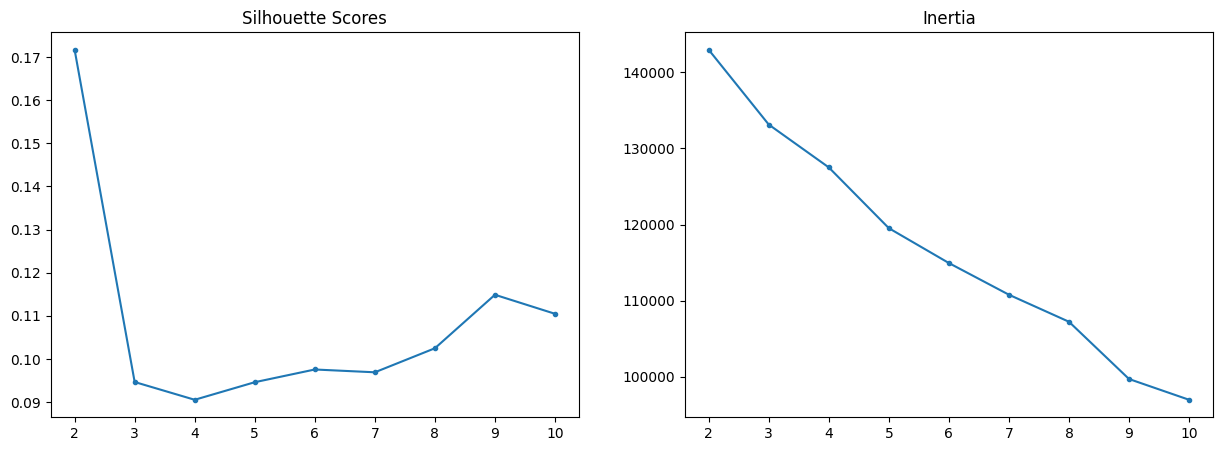

In [ ]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(df_scaled)
  sils.append(silhouette_score(df_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils, marker = '.')
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias, marker = '.')
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

- **Silhouette Scores:**
  - Highest at k=2 (~0.17) → indicates the cleanest separation.
  - Drops a lot after k=3, then slowly rises again around k=8–9, but still lower than at k=2.

- **Inertia:** (Elbow)
  - There’s a bend at k=3 or k=4, after the drop becomes more step by step.

The choice is from: k=2 or k=3

In [ ]:
# Refit KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, n_init= 'auto', random_state=42)
kmeans.fit(df_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5,cluster
0,1,2,9,2,0,240,0,1,78,85,80,85,82,0
1,0,2,2,1,0,60,0,1,70,68,70,64,60,1
2,0,3,5,1,0,60,0,1,72,71,74,88,75,0
3,0,1,5,0,0,60,0,1,69,30,63,35,75,1
4,1,2,3,0,0,60,0,1,70,65,62,75,68,1


In [ ]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,0,0.429097,2.158195,4.702375,0.372565,0.078622,71.638955,0.075178,0.909145,79.685748,80.577316,86.642518,83.345962,86.294181
1,1,0.481439,1.957077,3.830162,0.274014,0.163805,80.897912,0.124594,0.477494,62.854756,63.853828,66.238515,60.650116,62.109977


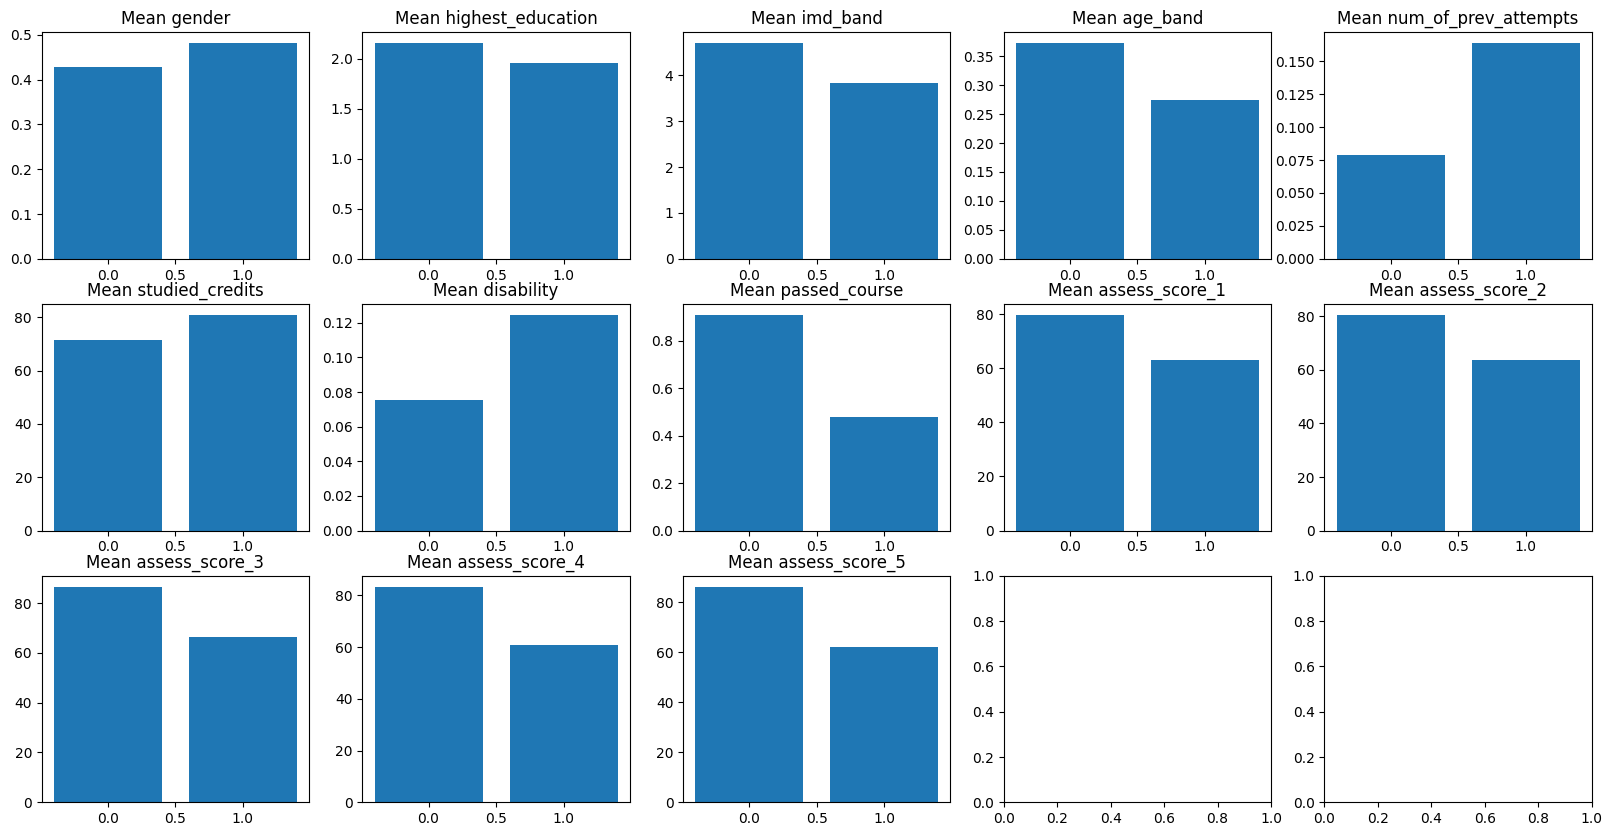

In [ ]:
# Visualize means
fig, axes = plt.subplots(3,5, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

####**Cluster Analysis Report:**
* **Cluster 0: High-Achieving & Engaged Students**
This group represents the most successful students. They are characterized by strong academic performance and positive engagement indicators.
  - Demographics: They tend to come from less deprived neighborhoods (imd_band is higher) and are less likely to have a registered disability.
  - Academic Performance: They have higher assessment scores across all assessments with scores (80-85), and they have higher pass rate nearly (~0.88 - close to 90%).
  - Study Habits: They have fewer previous attempts on courses which suggests stronger academic preparation and have slightly lower studied credits, suggesting efficiency.

-----

* **Cluster 1: Struggling Students**
This group represents students who face significant challenges and are at a higher risk of failing.
  - Demographics: They are more likely to come from deprived neighborhood (imd_band is lower) and have a higher incidence of registered disability.
  - Academic Performance: They have markedly lower assessment scores (60-65) and a pass rate only nearly (~50%), much lower than Cluster 0.
  - Study Habits: They have more previous attempts which suggesting repeated struggles and theu take slightly more credits, possibly overloading themselves.

# **Part 2: Modeling Instructions:**

## **Explore & Clean Data**

In [ ]:
# Load the dataset
fpath2 = '/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/05-IntermediateML/Option_B_modeling.csv'
df2 = pd.read_csv(fpath2)

# Display basic info
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Columns: 931 entries, gender to presentation_2014J
dtypes: float64(910), int64(21)
memory usage: 90.5 MB


,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5,assess_submitted_1,assess_submitted_2,assess_submitted_3,assess_submitted_4,assess_submitted_5,assess_submitted_6,assess_score_6,assess_submitted_7,assess_score_7,assess_submitted_8,assess_score_8,assess_submitted_9,assess_score_9,assess_submitted_10,assess_score_10,assess_submitted_11,assess_score_11,assess_submitted_12,assess_score_12,assess_submitted_13,assess_score_13,assess_submitted_14,assess_score_14,sum_activities_-25,sum_click_-25,activities_x_clicks_-25,sum_activities_-24,sum_click_-24,activities_x_clicks_-24,sum_activities_-23,sum_click_-23,activities_x_clicks_-23,sum_activities_-22,sum_click_-22,activities_x_clicks_-22,sum_activities_-21,sum_click_-21,activities_x_clicks_-21,sum_activities_-20,sum_click_-20,activities_x_clicks_-20,sum_activities_-19,sum_click_-19,activities_x_clicks_-19,sum_activities_-18,sum_click_-18,activities_x_clicks_-18,sum_activities_-17,sum_click_-17,activities_x_clicks_-17,sum_activities_-16,sum_click_-16,activities_x_clicks_-16,sum_activities_-15,sum_click_-15,activities_x_clicks_-15,sum_activities_-14,sum_click_-14,activities_x_clicks_-14,sum_activities_-13,sum_click_-13,activities_x_clicks_-13,sum_activities_-12,sum_click_-12,activities_x_clicks_-12,sum_activities_-11,sum_click_-11,activities_x_clicks_-11,sum_activities_-10,sum_click_-10,activities_x_clicks_-10,sum_activities_-9,sum_click_-9,activities_x_clicks_-9,sum_activities_-8,sum_click_-8,activities_x_clicks_-8,sum_activities_-7,sum_click_-7,activities_x_clicks_-7,sum_activities_-6,sum_click_-6,activities_x_clicks_-6,sum_activities_-5,sum_click_-5,activities_x_clicks_-5,sum_activities_-4,sum_click_-4,activities_x_clicks_-4,sum_activities_-3,sum_click_-3,activities_x_clicks_-3,sum_activities_-2,sum_click_-2,activities_x_clicks_-2,sum_activities_-1,sum_click_-1,activities_x_clicks_-1,sum_activities_0,sum_click_0,activities_x_clicks_0,sum_activities_1,sum_click_1,activities_x_clicks_1,sum_activities_2,sum_click_2,activities_x_clicks_2,sum_activities_3,sum_click_3,activities_x_clicks_3,sum_activities_4,sum_click_4,activities_x_clicks_4,sum_activities_5,sum_click_5,activities_x_clicks_5,sum_activities_6,sum_click_6,activities_x_clicks_6,sum_activities_7,sum_click_7,activities_x_clicks_7,sum_activities_8,sum_click_8,activities_x_clicks_8,sum_activities_9,sum_click_9,activities_x_clicks_9,sum_activities_10,sum_click_10,activities_x_clicks_10,sum_activities_11,sum_click_11,activities_x_clicks_11,sum_activities_12,sum_click_12,activities_x_clicks_12,sum_activities_13,sum_click_13,activities_x_clicks_13,sum_activities_14,sum_click_14,activities_x_clicks_14,sum_activities_15,sum_click_15,activities_x_clicks_15,sum_activities_16,sum_click_16,activities_x_clicks_16,sum_activities_17,sum_click_17,activities_x_clicks_17,sum_activities_18,sum_click_18,activities_x_clicks_18,sum_activities_19,sum_click_19,activities_x_clicks_19,sum_activities_20,sum_click_20,activities_x_clicks_20,sum_activities_21,sum_click_21,activities_x_clicks_21,sum_activities_22,sum_click_22,activities_x_clicks_22,sum_activities_23,sum_click_23,activities_x_clicks_23,sum_activities_24,sum_click_24,activities_x_clicks_24,sum_activities_25,sum_click_25,activities_x_clicks_25,sum_activities_26,sum_click_26,activities_x_clicks_26,sum_activities_27,sum_click_27,activities_x_clicks_27,sum_activities_28,sum_click_28,activities_x_clicks_28,sum_activities_29,sum_click_29,activities_x_clicks_29,sum_activities_30,sum_click_30,activities_x_clicks_30,sum_activities_31,sum_click_31,activities_x_clicks_31,sum_activities_32,sum_click_32,activities_x_clicks_32,sum_activities_33,sum_click_33,activities_x_clicks_33,sum_activities_34,sum_click_34,activities_x_clicks_34,sum_activities_35,sum_click_35,activities_x_clicks_35,sum_activities_36,sum_click_36,activities_x_clicks_36,sum_activities_37,sum_click_37,activities_

In [ ]:
# check missing values and duplicates
print('missing values', df2.isna().sum().sum())
print('\nduplicated rows', df2.duplicated().sum())

missing values 0

duplicated rows 0


## **Prepare for modeling**

In [ ]:
# split data
X = df.drop(columns='passed_course')
y = df['passed_course']

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, random_state = 42)

In [ ]:
# Split the X_test_val into test and val data
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size = .5, random_state=42)

* Since all data are numerical we will directly scale them.

In [ ]:
scaler = StandardScaler()

X_train_tf = scaler.fit_transform(X_train)
X_test_tf = scaler.transform(X_test)
X_val_tf = scaler.transform(X_val)

## **PCA**

In [ ]:
# Initialize and fit PCA
pca = PCA()
pca.fit(X_train_tf)

PCA()

In [ ]:
# Determine how much variance is explained by each PC
explained = pd.Series(pca.explained_variance_ratio_, name='Explained Variance Ratio')
explained

,Explained Variance Ratio
0,0.245997
1,0.105204
2,0.094561
3,0.079996
4,0.077426
5,0.073339
6,0.066016
7,0.061010
8,0.051922
9,0.044615


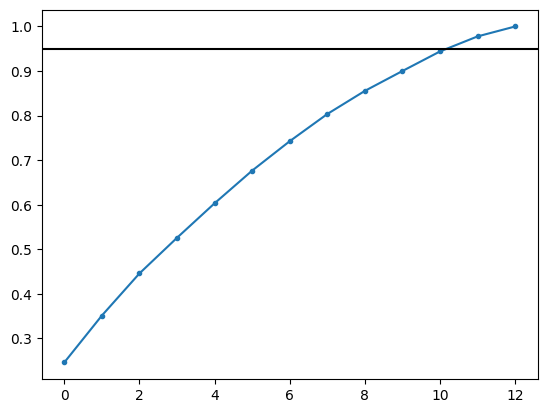

In [ ]:
# plot the cumulative sum of the percentage of explained variance for each component and those before it.
ax = explained.cumsum().plot(marker='.')
# add a line to mark .95 variance explained
ax.axhline(.95, color='k');

In [ ]:
# Define PCA to address 95% of the variance
pca95 = PCA(n_components=.95)
# fit and transform on training data
X_train_pca = pca95.fit_transform(X_train_tf)
# transform test data
X_test_pca = pca95.transform(X_test_tf)
# transform validation data
X_val_pca = pca95.transform(X_val_tf)
# obtain the number of PCs used
pca95.n_components_

np.int64(12)

In [ ]:
X_train_pca.head(3)

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11
3564,-1.932155,-0.620280,0.359665,-0.143412,-0.330584,-0.462003,-1.282746,-0.810231,0.546347,-0.720912,-0.080828,-0.557367
2458,-0.866668,-1.804518,0.661633,1.142067,-0.056734,-0.530800,0.588586,-0.828521,-0.255394,0.402419,0.798305,0.173440
4749,-0.963885,0.682918,-0.410275,-0.154574,-1.235857,-0.772066,-0.831607,-0.480881,-0.565980,0.084496,-0.523595,0.329755


## **Modeling (Deep Learning)**

* Define history funcation

In [ ]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

In [ ]:
# Define shape
input_shape = X_train_pca.shape[1]
input_shape

12

### Model 1:

In [ ]:
# Build binary classification model within function
# (model 1)
def build_model1():
    # Instantiate Model
    model = Sequential()

    model.add(Dense(12, input_dim =input_shape, activation = 'relu'))
    model.add(Dense(6, activation = 'relu'))
    model.add(Dropout(.2))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    return model

In [ ]:
# Call our build function to build model
clf_model1 = build_model1()

# Get model summary
clf_model1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history1 = clf_model1.fit(X_train_pca, y_train,
                        validation_data=(X_val_pca, y_val),
                        epochs=50,
                        verbose=0, callbacks = [early_stop])

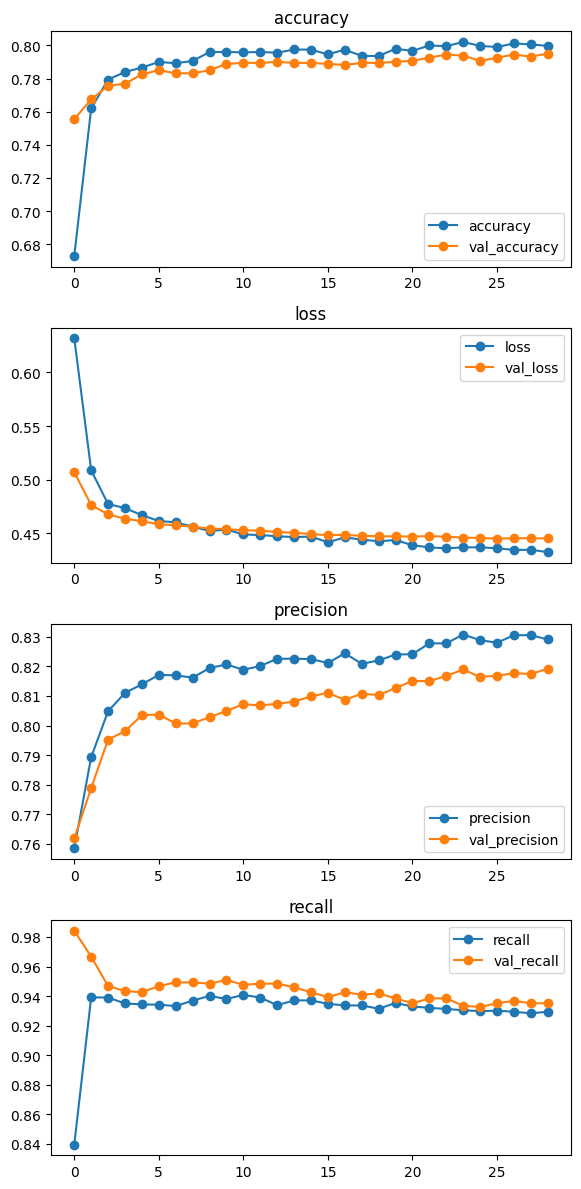

In [ ]:
# plot learning history
plot_history(history1);

**Accuracy**
- Accuracy for training and validation are nearly the same, around (0.79-0.80)
- There is no much gap between them, not much overfitting.

**Loss Curve**
- Loss decreases nicely for both train and validation.
- Converges around epoch 10–15.
- Early stopping worked (patience=3 stopped training early, prevent overfitting).

**Precision Curve**
- Precision for class 1 stabilizes around 0.82–0.83.
- Validation precision slightly higher than training.

**Recall Curve**
- Recall is very high (~0.93–0.94).
- This means your model is catching most of the positive cases (class 1).
- But recall for class 0 is poor (as shown in confusion matrix).

In [ ]:
# make predictions
y_pred_test = clf_model1.predict(X_test_pca)
y_pred_test[:5]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.90494215],
       [0.35810822],
       [0.3746757 ],
       [0.9128321 ],
       [0.92186487]], dtype=float32)

In [ ]:
# round the predictions
y_pred_test = np.round(y_pred_test)
y_pred_test[:5]

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.66      0.41      0.51       376
           1       0.84      0.93      0.88      1216

    accuracy                           0.81      1592
   macro avg       0.75      0.67      0.70      1592
weighted avg       0.80      0.81      0.79      1592



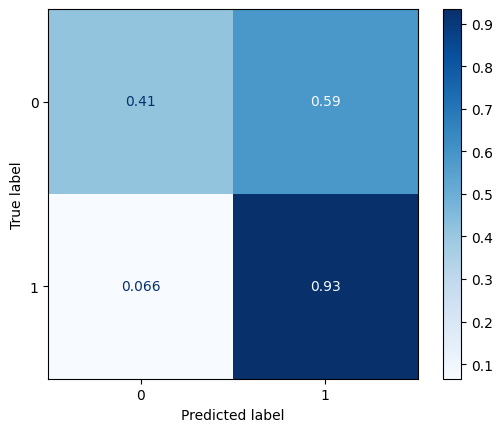

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues',
                                       normalize='true');

The model performs well on the majority class (1) but struggles with minority class (0), this is typical of imbalanced datasets.

### Model 2:

- More neurons (bigger network)
- Handle imbalnce (class weights added)
- Higher dropout
- Use L2 regularization
- Added AUC

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

In [ ]:
from tensorflow.keras.metrics import AUC

# Build binary classification model within function
# (model 2)
def build_model2():
    # Instantiate Model
    model = Sequential()

    model.add(Dense(32, input_dim =input_shape, activation = 'relu',
                    kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dense(16, activation = 'relu',
                    kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(.3))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy', metrics.Precision(), metrics.Recall(), AUC()])
    return model

In [ ]:
# Call our build function to build model
clf_model2 = build_model2()

# Get model summary
clf_model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history2 = clf_model2.fit(X_train_pca, y_train,
                        validation_data=(X_val_pca, y_val),
                        epochs=50,
                        verbose=0, class_weight=class_weight_dict,
                        callbacks = [early_stop])

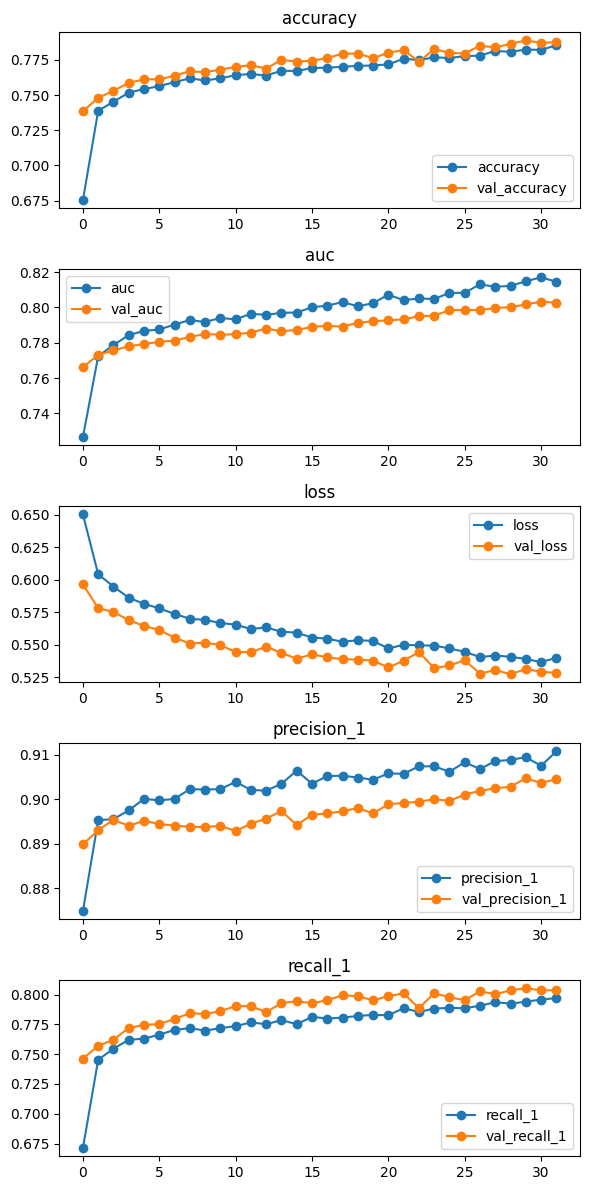

In [ ]:
# plot learning history
plot_history(history2);

**Accuracy**
- Accuracy dropped slightly compared with model 1 (from 0.8 to ~0.76-0.77)
- No big gap → not much overfitting.

**AUC**
- Training AUC goes up to nearly ~0.80.
- Validation AUC nearly ~0.78.
- Model can separate classes reasonably well.

**Loss Curve**
- Both training and validation loss decrease together.

**Precision Curve**
- Precision for class 1 increase from around 0.82–0.83 to nearly ~0.70
- Very few false positives.

**Recall Curve**
- Recall improves gradually up to ~0.78.
- Recall is lower than Model 1 (which had ~0.94), but more balanced.

In [ ]:
# make predictions
y_pred_test = clf_model2.predict(X_test_pca)
y_pred_test[:5]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.75316745],
       [0.16480681],
       [0.15669239],
       [0.7877127 ],
       [0.88501644]], dtype=float32)

In [ ]:
# round the predictions
y_pred_test = np.round(y_pred_test)
y_pred_test[:5]

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.53      0.71      0.61       376
           1       0.90      0.81      0.85      1216

    accuracy                           0.79      1592
   macro avg       0.72      0.76      0.73      1592
weighted avg       0.81      0.79      0.80      1592



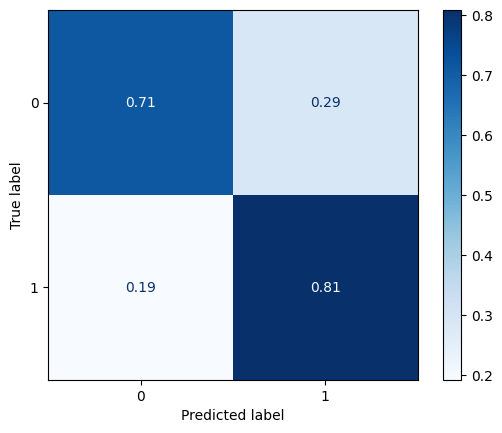

In [ ]:
print(classification_report(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues',
                                       normalize='true');

**Class 0:**
- Recall jumped (0.37 → 0.73 compared to Model 1).
- This model (model 2) is much better at catching class 0.
- Precision dropped (0.64 → 0.51), meaning more false positives.

**Class 1 (majority):**
- Precision improved (0.82 → 0.90).
- Recall dropped (0.94 → 0.78).
- Fewer false positives, but more false negatives.

Even though accuracy slightly decreased but Model 2 is more balanced, doesn’t just predict class 1 all the time.

### Model 3: (KerasTuner)

In this model we'll let kerasTuner search best option:
- Number of hidden layers (1–3).
- Number of units per layer (e.g., 16 → 128).
- Dropout rate (0 → 0.5).
- L2 regularization strength (to control overfitting).
- Learning rate (because recall vs precision depends a lot on it).
- Optimizer (Adam, Nadam, RMSProp).
- Batch size (small vs large batches can change recall/precision balance).

In [ ]:
!pip install keras-tuner

In [ ]:
from keras_tuner import HyperParameters as hp
import keras_tuner as kt
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Build and Compile Model within a function to try different optimizers, units, and dropout values
def build_model3(hp):
    model = Sequential()

    # First layer
    model.add(Dense(
        units=hp.Int("units_input", min_value=16, max_value=128, step=16),
        activation='relu',
        kernel_regularizer=l2(hp.Float("l2_input", 1e-6, 1e-3, sampling="log")),
        input_dim=input_shape
    ))
    model.add(BatchNormalization())

    # Hidden layers (try 1–3)
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(Dense(
            units=hp.Int(f"units_{i}", min_value=16, max_value=128, step=16),
            activation='relu',
            kernel_regularizer=l2(hp.Float(f"l2_{i}", 1e-6, 1e-3, sampling="log"))
        ))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float(f"dropout_{i}", min_value=0.0, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Float("lr", 1e-4, 1e-2, sampling="log")
        ),
        loss="binary_crossentropy",
        metrics=[
            "accuracy",
            tf.keras.metrics.AUC(name="auc"),
            tf.keras.metrics.Precision(name="precision"),
            tf.keras.metrics.Recall(name="recall"),
        ],
    )
    return model

In [ ]:
# Make a folder to store results of hyperparameter tuning
import os
folder = 'KerasTuner/'
os.makedirs(folder, exist_ok=True)

In [ ]:
tuner = kt.Hyperband(
    build_model3,
    objective="val_auc",    # instead of val_accuracy
    max_epochs=50,
    factor=3,
    directory=folder,
    project_name="model3_tuning",
    overwrite=True,
    seed=42
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

In [ ]:
tuner.search(X_train_pca, y_train, epochs=100,
    validation_data=(X_val_pca, y_val), callbacks=[early_stop] )

Trial 90 Complete [00h 00m 43s]
val_auc: 0.7994581460952759

Best val_auc So Far: 0.8497759103775024
Total elapsed time: 00h 34m 26s


In [ ]:
# Obtain best hyperparameter values
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values

{'units_input': 80,
 'l2_input': 1.3233946627272024e-05,
 'num_layers': 3,
 'units_0': 48,
 'l2_0': 1.4171721082415683e-06,
 'dropout_0': 0.0,
 'lr': 0.007255565349251887,
 'units_1': 16,
 'l2_1': 8.376441465924288e-06,
 'dropout_1': 0.2,
 'units_2': 112,
 'l2_2': 5.609528360177421e-06,
 'dropout_2': 0.0,
 'tuner/epochs': 50,
 'tuner/initial_epoch': 17,
 'tuner/bracket': 3,
 'tuner/round': 3,
 'tuner/trial_id': '0046'}

In [ ]:
# Obtain best model
best_model = tuner.get_best_models()[0]
best_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 80)             │           320 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         3,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48)             │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 112)            │         1,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112)            │           448 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           113 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,753 (34.19 KB)

 Trainable params: 8,241 (32.19 KB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
# Evaluate neural network with tuned optimizer, units, and dropout
result = best_model.evaluate(X_test_pca, y_test, return_dict=True)
result

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8395 - auc: 0.8648 - loss: 0.3551 - precision: 0.8620 - recall: 0.9433


{'accuracy': 0.8341708779335022,
 'auc': 0.8561314344406128,
 'loss': 0.37234723567962646,
 'precision': 0.8510324358940125,
 'recall': 0.9490131735801697}

In [ ]:
# Inspect results in more detail
tuner.results_summary(5)

Results summary
Results in KerasTuner/model3_tuning
Showing 5 best trials
Objective(name="val_auc", direction="max")

Trial 0051 summary
Hyperparameters:
units_input: 80
l2_input: 1.3233946627272024e-05
num_layers: 3
units_0: 48
l2_0: 1.4171721082415683e-06
dropout_0: 0.0
lr: 0.007255565349251887
units_1: 16
l2_1: 8.376441465924288e-06
dropout_1: 0.2
units_2: 112
l2_2: 5.609528360177421e-06
dropout_2: 0.0
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0046
Score: 0.8497759103775024

Trial 0050 summary
Hyperparameters:
units_input: 48
l2_input: 0.0001684037787749665
num_layers: 2
units_0: 112
l2_0: 0.000791006028547127
dropout_0: 0.0
lr: 0.0032414632197183516
units_1: 16
l2_1: 0.0003472774134524792
dropout_1: 0.2
units_2: 128
l2_2: 3.7685953192101326e-06
dropout_2: 0.0
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0047
Score: 0.8496080040931702

Trial 0047 summary
Hyperparameters:
units_input: 48
l2_inp

In [ ]:
history3 = best_model.fit(X_train_pca, y_train,
                        validation_data=(X_val_pca, y_val),
                        epochs=100,
                        verbose=0,
                        callbacks = [early_stop])

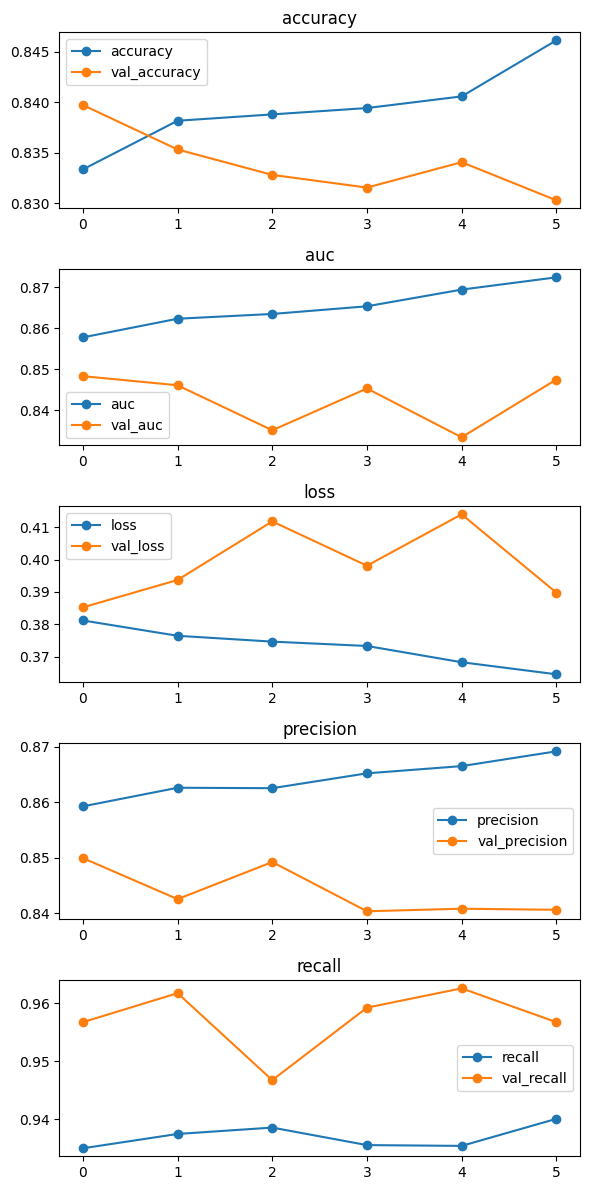

In [ ]:
# plot learning history
plot_history(history3);

**Accuracy**
- Training accuracy steadily improves from ~0.833 to ~0.846.
- Validation accuracy stays slightly lower (~0.832–0.840) but close to training → minimal overfitting.
- Overall accuracy is the best compared with Model 1 and Model 2.

**AUC**
- Training AUC rises to ~0.87.
- Validation AUC fluctuates between ~0.837–0.848, slightly below training.
- Still indicates strong separation ability between classes.

**Loss Curve**
- Training loss decreases smoothly from ~0.38 to ~0.36.
- Validation loss fluctuates between ~0.38–0.41, showing mild instability but no severe overfitting.

**Precision Curve**
- Training precision increases gradually to ~0.87.
- Validation precision is stable around ~0.84–0.85.
- Good at avoiding false positives (wrongly predicting success).

**Recall Curve**
- Training recall is very high (~0.93–0.94) and stable.
- Validation recall is even higher (~0.95–0.96).
- This means the model is excellent at catching true positives (students who succeed).

## **Final model - conclusion**

**Model 1:**
- Strength: Excellent at catching students who succeed.
- Weakness: Struggles to identify failing students, which could be a problem.

**Model 2:**
- Strength: More balanced between success and failure detection.
- Weakness: Lower overall accuracy and recall compared to other models.

**Model 3:**
- Strength: Best overall accuracy, AUC, and recall; strong stability and generalization.
- Weakness: Like Model 1, recall for failing students may be weaker.



**Final choice:**
Model 3 demonstrates the strongest overall performance across multiple metrics: highest accuracy, excellent recall, strong AUC, and stable precision. It generalizes well without signs of overfitting, making it the most reliable choice for predicting student outcomes.

**Business Impact:**
The model achieved an accuracy of 0.83. It has a recall of 0.95, meaning it can correctly identify nearly 95% of the students who will succeed. Its precision is 0.85, indicating that about 85% of the students predicted to succeed actually do succeed.

This model will effectively help institutions predict student success, allowing them to:
- Identify students on track to succeed with high confidence.
- Support early interventions by monitoring students flagged at risk.
- Enhance decision-making in academic planning, resource allocation, and personalized support.
- Overall, Model 3 provides a strong, stable, and accurate tool for predicting student outcomes and supporting the business problem of improving student success rates.